In [1]:
import pandas as pd

In [58]:
#loading the data
df = pd.read_csv('titanic_prepared_data.csv')
#df.head()

In [59]:
#separating features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
y=y.ravel()

In [60]:
#splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# For each algorithm, there are various Methods to build the model. Each method gives us different accuracy. 

# Code for logistic regression

# Method 1

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(C=0.08)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
acc_max_logRig=round(accuracy_score(y_test, y_pred)*100,2)
print(acc_max_logRig,"%")


81.34 %


# Method 2

In [62]:
C = [10, 1, 0.2, .1, .001, 0.08]

for c in C:
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', round(clf.score(X_train, y_train)*100,2),"%")
    y_pred = clf.predict(X_test)
    print('Test accuracy:',round(accuracy_score(y_test, y_pred)*100,2),"%")
    print('')

C: 10
Coefficient of each feature: [[ -2.73160585e+00  -3.90012839e-02   1.93211673e-03   1.60830300e+00
    7.99601577e-01  -4.39758706e-01   8.22298127e-01   8.22853186e-01
    3.22994555e-01  -2.52935319e-01]]
Training accuracy: 80.42 %
Test accuracy: 80.22 %

C: 1
Coefficient of each feature: [[-2.52299322 -0.03304177  0.00265557  1.40064166  0.72137747 -0.42836651
   0.7302452   0.69632194  0.26708549 -0.21619185]]
Training accuracy: 80.58 %
Test accuracy: 80.22 %

C: 0.2
Coefficient of each feature: [[-2.00790391 -0.02060092  0.00469043  0.93151931  0.54246262 -0.3927509
   0.51756772  0.42932747  0.13433586 -0.14225589]]
Training accuracy: 80.9 %
Test accuracy: 80.6 %

C: 0.1
Coefficient of each feature: [[-1.66931568 -0.01482377  0.00615799  0.67611433  0.43745251 -0.36749646
   0.39432742  0.29439425  0.05734871 -0.10756226]]
Training accuracy: 81.86 %
Test accuracy: 80.6 %

C: 0.001
Coefficient of each feature: [[-0.07124629 -0.02293286  0.01322887  0.01798825  0.01467199 -0.

# Method 3- Best Generalised method

In [63]:
#scikit-learn’s LogisticRegressionCV method includes a parameter Cs. If supplied a list, Cs is the candidate hyperparameter values to select from. 
#If supplied a integer, Cs a list of that many candidate values will is drawn from a logarithmic scale between 0.0001 and and 10000 (a range of reasonable values for C)
from sklearn import linear_model
# Create cross-validated logistic regression
clf = linear_model.LogisticRegressionCV(Cs=1000)
# Train model
clf.fit(X, y)
print(round(clf.score(X,y)*100, 2),"%")

80.58 %


In [64]:
#clf.best_params()

# Method 4

In [65]:
from sklearn.grid_search import GridSearchCV
clf = LogisticRegression()
param_grid=dict(C=[0.008 ,0.8, 0.9, 0.1, 1, 10])
# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
print(grid)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.008, 0.8, 0.9, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [66]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.008, 0.8, 0.9, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [67]:
# examine the best model
print(round(grid.best_score_ * 100 , 2),"%")
print(grid.best_params_)
print(grid.best_estimator_)

80.47 %
{'C': 0.1}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Code for KNN

# Method 1

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.ravel())
y_pred_knn = clf.predict(X_test)
print(round(accuracy_score(y_pred_knn, y_test)*100,2), "%")

68.28 %


# Method 2

In [69]:
# search for an optimal value of K for KNN
from sklearn.cross_validation import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.68924412665985701, 0.69263988196572468, 0.7173476336397685, 0.70279111338100109, 0.70954517080921575, 0.69380149812734082, 0.71292900919305402, 0.69049341731926006, 0.71065599818408809, 0.6971844853024628, 0.70166638293042782, 0.69828282828282828, 0.71174128929746905, 0.70614856429463169, 0.71286573601180347, 0.71181619566451038, 0.7095446033367383, 0.70845789354216326, 0.70391300646918631, 0.70735926682555894, 0.69834496651912381, 0.71069231642265351, 0.70729684485302458, 0.69837021904437635, 0.69498694813301554, 0.69834496651912381, 0.69950686641697879, 0.70847066167290884, 0.70847009420043128, 0.71184116445352408]


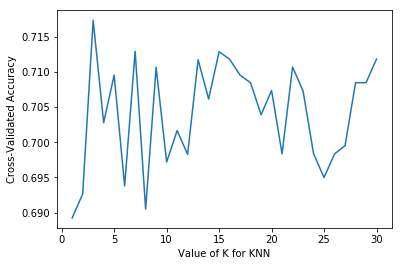

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [71]:
# 10-fold cross-validation with the best KNN model having K=3
knn = KNeighborsClassifier(n_neighbors=3)
print(round(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean() * 100,2),"%")

71.73 %


# Method 3- Using GridSearchCV

In [72]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [73]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [74]:
grid.fit(X, y)
acc_max_KNN=round(grid.best_score_ * 100, 2)

In [75]:
# examine the best model
print(acc_max_KNN, " %")
print(grid.best_params_)
print(grid.best_estimator_)

71.72  %
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


# Gaussian Naive Bayes

# Method 1

In [81]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

78.36 percent


# Method 2

In [82]:
from sklearn.calibration import CalibratedClassifierCV
# Create calibrated cross-validation with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')

In [83]:
# Calibrate probabilities
clf_sigmoid.fit(X, y)

CalibratedClassifierCV(base_estimator=GaussianNB(priors=None), cv=2,
            method='sigmoid')

In [84]:
acc_max_gnb=round(clf_sigmoid.score(X, y) * 100, 2)
print(acc_max_gnb)

79.35


# Decision Tree

# Method 1

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision_tree) + ' %')

76.12 %


# Method 2

In [97]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5]}
model =DecisionTreeClassifier(criterion="entropy")

grid= GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = 10)

grid.fit(X, y)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [98]:
acc_max_DT=round(grid.best_score_ * 100, 2)

# examine the best model
print(acc_max_DT, "%")
print(grid.best_params_)
print(grid.best_estimator_)

81.26 %
{'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


# Code for Random Forest

# Method 1

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(accuracy_score(y_pred_random_forest, y_test) * 100, 2)
print (str(acc_random_forest) + ' %')

80.22 %


# Method 2

In [104]:
# Create a dictionary containing all the candidate values of the parameters
parameter_grid = dict(n_estimators=list(range(1, 1000, 100)))

# Creata a random forest object
random_forest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create a gridsearch object with 5-fold cross validation, and uses all cores (n_jobs=-1)
grid = GridSearchCV(estimator=random_forest, param_grid=parameter_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X,y)
acc_max_RFC=round(grid.best_score_ *100,2)
print(acc_max_RFC, " %")
print(grid.best_params_)
print(grid.best_estimator_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.0s finished


81.37  %
{'n_estimators': 201}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=201, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


# Comparing Models

In [105]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_max_logRig, acc_max_KNN,  acc_max_DT, 
              acc_max_RFC, acc_max_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,81.37
0,Logistic Regression,81.34
2,Decision Tree,81.26
4,Naive Bayes,79.35
1,KNN,71.72


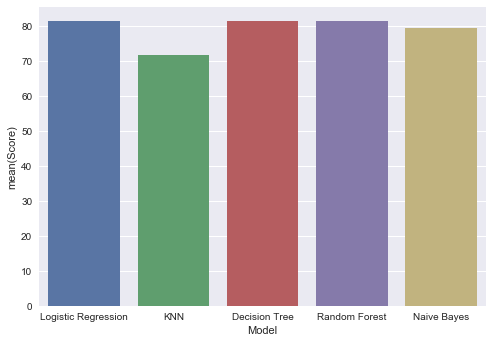

In [108]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#barplot between pclass and survived
sns.barplot(x='Model', y='Score', data=models)